**آمار توصیفی**

1-
```
data = {
    'Date':
    'Crypto_ID': (or Name)
    'Market_Cap':
    'Volume_24h':
}
```
2- I have no idea rn

3-


```
cryptocurrencies_data = pd.DataFrame({
    'Cryptocurrency':
    'TradingVolume':
})
```

4-
I need PriceChange and Cryptocurrency

5- I have no idea rn

**آزمون فرض**


1-

```
crypto_data = {
    "PriceChange":
    "DayOfWeek": np.random.choice(["Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday", "Tuesday"], size=num_days),
}
```

2-


```
crypto_data = {
    "Cryptocurrency":
    "TradingVolume":
}
```




In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random


In [1]:
from models import Currency, CurrenciesHistory, Session


Session = Session()

# آمار توصیفی


Part 1 (Done)

In [122]:
currencies = Session.query(Currency.id, Currency.Name)
currencies_with_data = []

for currency in currencies:
    currency_data = {
        'Name': currency.Name,
        
        'marketCap': [
            currency_history.marketCap
            for currency_history in Session.query(CurrenciesHistory.marketCap)
            .filter(CurrenciesHistory.currency_id == currency.id)
        ],
        'volume': [
            currency_history.volume 
            for currency_history in Session.query(CurrenciesHistory.volume)
            .filter(CurrenciesHistory.currency_id == currency.id)
        ],
    }
    currencies_with_data.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_data)

print(df)


                  Name                                          marketCap  \
0              Bitcoin  [505774022624, 503786436421, 502435875824, 504...   
1             Ethereum  [196688728216, 196796363892, 195769929355, 197...   
2          Tether USDt  [82897999834, 82911159056, 82844651545, 828522...   
3                  BNB  [32985441375, 32992942464, 32867117170, 333236...   
4                  XRP  [26756322906, 26440704279, 26386864348, 270609...   
..                 ...                                                ...   
195           PlayDapp  [80603997, 80083393, 79538941, 81666232, 86692...   
196      Pundi X (New)  [84819315, 85537692, 81895677, 83385548, 86513...   
197  Vulcan Forged PYR  [106428245, 90627825, 90319462, 94459712, 8981...   
198             Status  [82380497, 82437915, 81335039, 82149448, 84620...   
199                Amp  [77519963, 79566843, 80326412, 83495800, 80974...   

                                                volume  
0    [8962524523, 

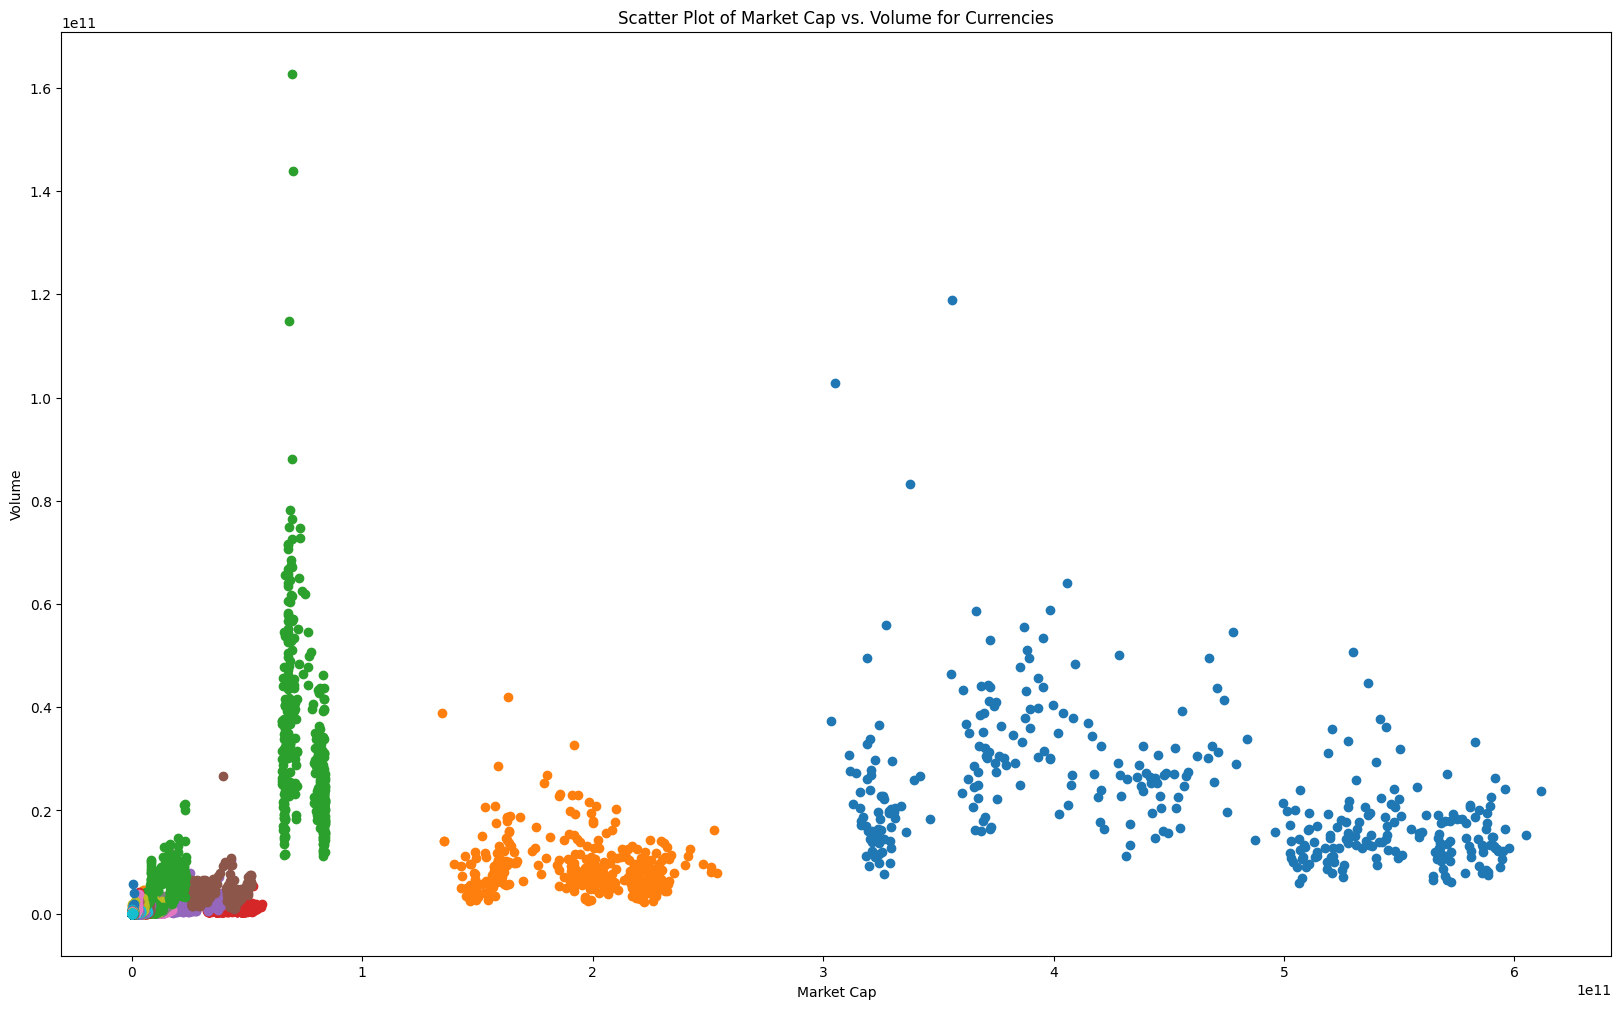

In [123]:
# Initialize the scatter plot
plt.figure(figsize=(20, 12))

# Plot each currency's data point
for index, row in df.iterrows():
    plt.scatter(row['marketCap'], row['volume'], label=row['Name'])

# Set plot labels and title
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.title('Scatter Plot of Market Cap vs. Volume for Currencies')

# Show the plot
plt.show()

Part 2

In [ ]:
# Sample data (replace with your actual data)
np.random.seed(0)
num_days = 365
cryptocurrencies = ["BTC", "ETH", "XRP", "LTC", "ADA"]  # Replace with your cryptocurrency symbols
pairs = [(crypto1, crypto2) for crypto1 in cryptocurrencies for crypto2 in cryptocurrencies if crypto1 < crypto2]

data = {
    "Date": pd.date_range(start="2022-09-01", periods=num_days, freq="D"),
    **{f"{pair[0]}_to_{pair[1]}": np.random.choice([-1, 0, 1], size=num_days) for pair in pairs}
}

df = pd.DataFrame(data)

# Calculate the number of aligned days for each pair
aligned_days = df.iloc[:, 1:].apply(lambda row: sum(row != 0), axis=0)

# Sort pairs by the number of aligned days in descending order
sorted_pairs = sorted(zip(pairs, aligned_days), key=lambda x: x[1], reverse=True)

# Display the top 30 pairs
top_30_pairs = sorted_pairs[:30]

# Print the results
print("Top 30 cryptocurrency pairs with the most days of price changes in the last year:")
for pair, days in top_30_pairs:
    print(f"Pair: {pair[0]} to {pair[1]}, Aligned Days: {days}")

Top 30 cryptocurrency pairs with the most days of price changes in the last year:
Pair: ADA to LTC, Aligned Days: 251
Pair: ETH to XRP, Aligned Days: 247
Pair: ADA to ETH, Aligned Days: 247
Pair: ADA to BTC, Aligned Days: 245
Pair: BTC to ETH, Aligned Days: 241
Pair: BTC to XRP, Aligned Days: 241
Pair: ADA to XRP, Aligned Days: 240
Pair: BTC to LTC, Aligned Days: 237
Pair: ETH to LTC, Aligned Days: 236
Pair: LTC to XRP, Aligned Days: 234


Part 3

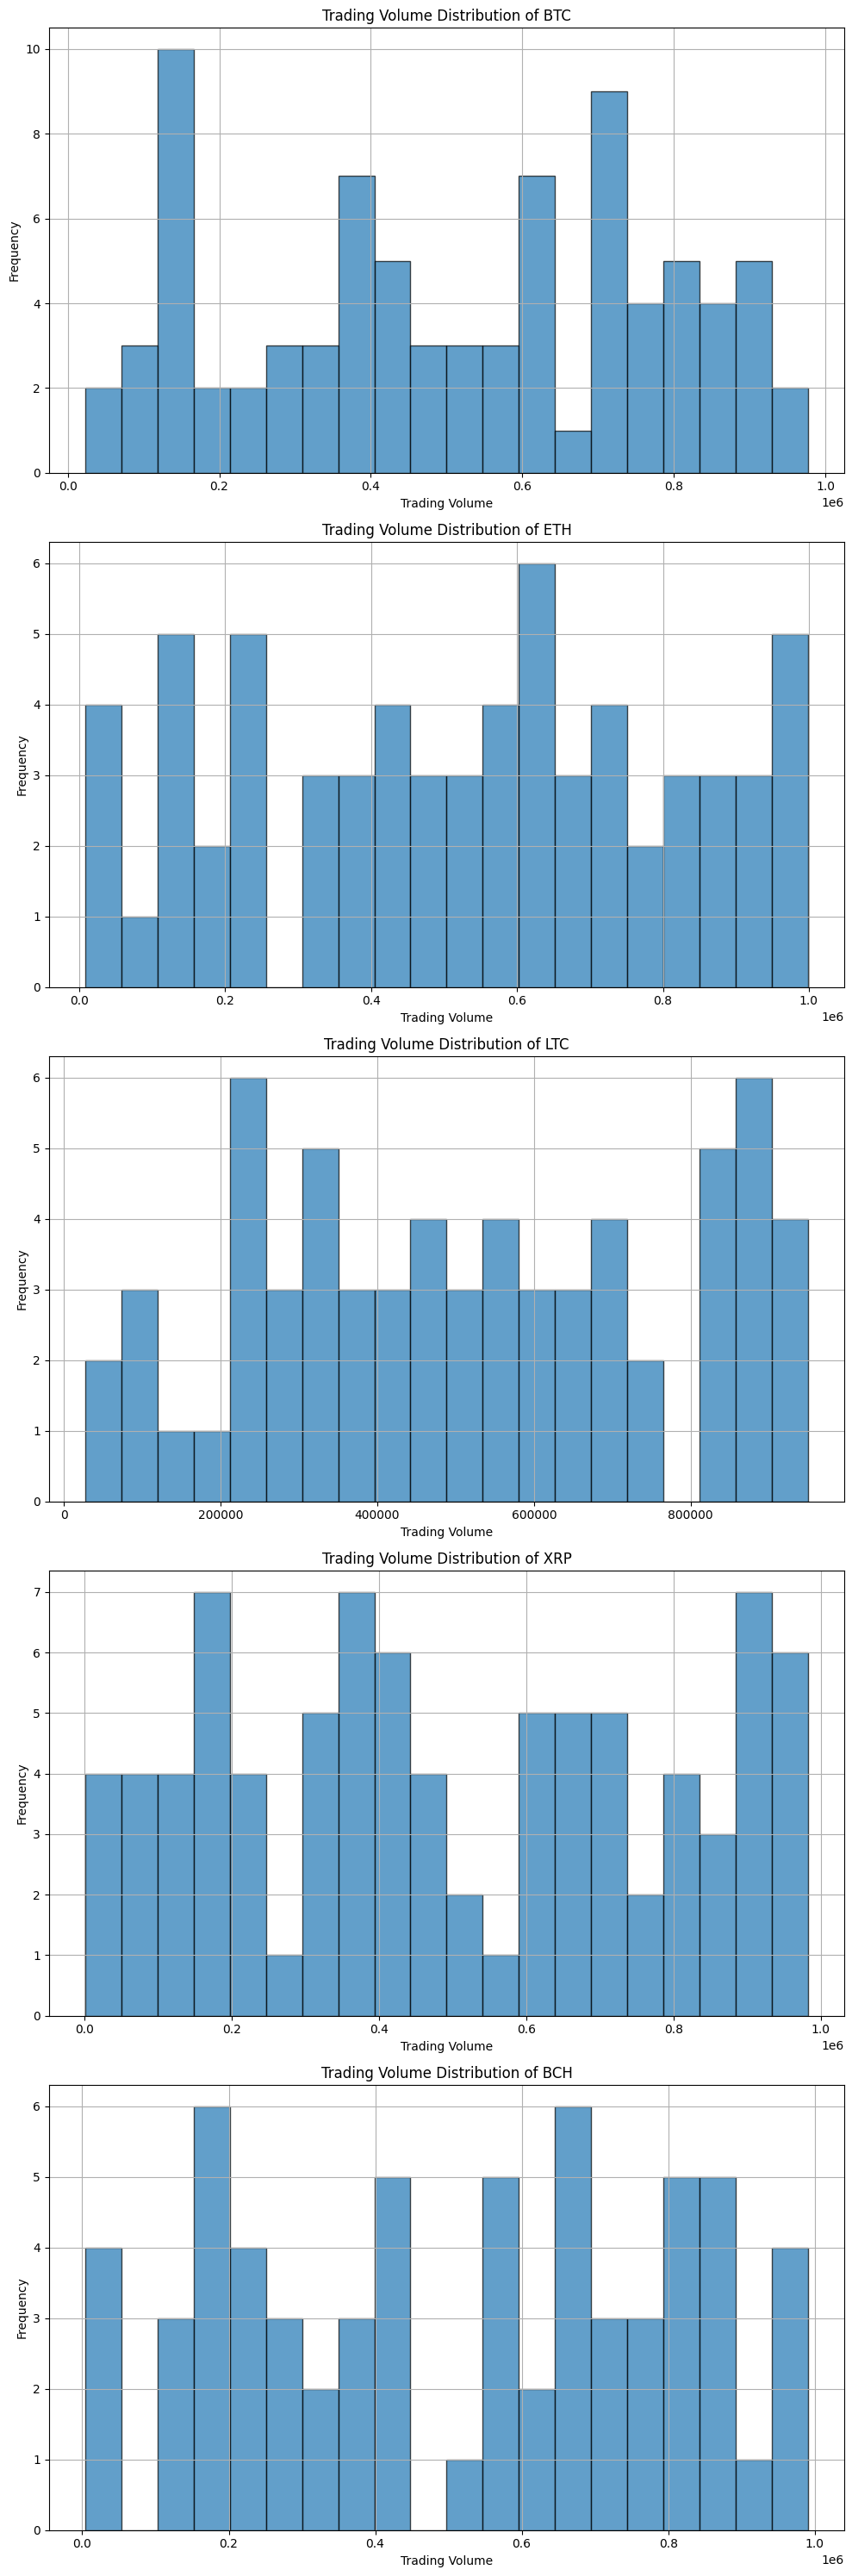

In [ ]:
# Sample data (replace with your actual data)
np.random.seed(0)
num_days = 365
cryptocurrencies = ["BTC", "ETH", "LTC", "XRP", "BCH"]  # Replace with your cryptocurrency symbols

data = {
    "Cryptocurrency": np.random.choice(cryptocurrencies, num_days),
    "Date": pd.date_range(start="2023-01-01", periods=num_days, freq="D"),
    "Trading Volume": np.random.randint(1, 1000, size=num_days) * 1e3  # Replace with daily trading volumes
}

df = pd.DataFrame(data)

# Create subplots for each cryptocurrency
fig, axes = plt.subplots(nrows=len(cryptocurrencies), figsize=(10, 6 * len(cryptocurrencies)))

for i, crypto in enumerate(cryptocurrencies):
    filtered_df = df[df["Cryptocurrency"] == crypto]
    axes[i].hist(filtered_df["Trading Volume"], bins=20, edgecolor="k", alpha=0.7)
    axes[i].set_title(f"Trading Volume Distribution of {crypto}")
    axes[i].set_xlabel("Trading Volume")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Part 4

<ipython-input-21-844347bc7a97>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


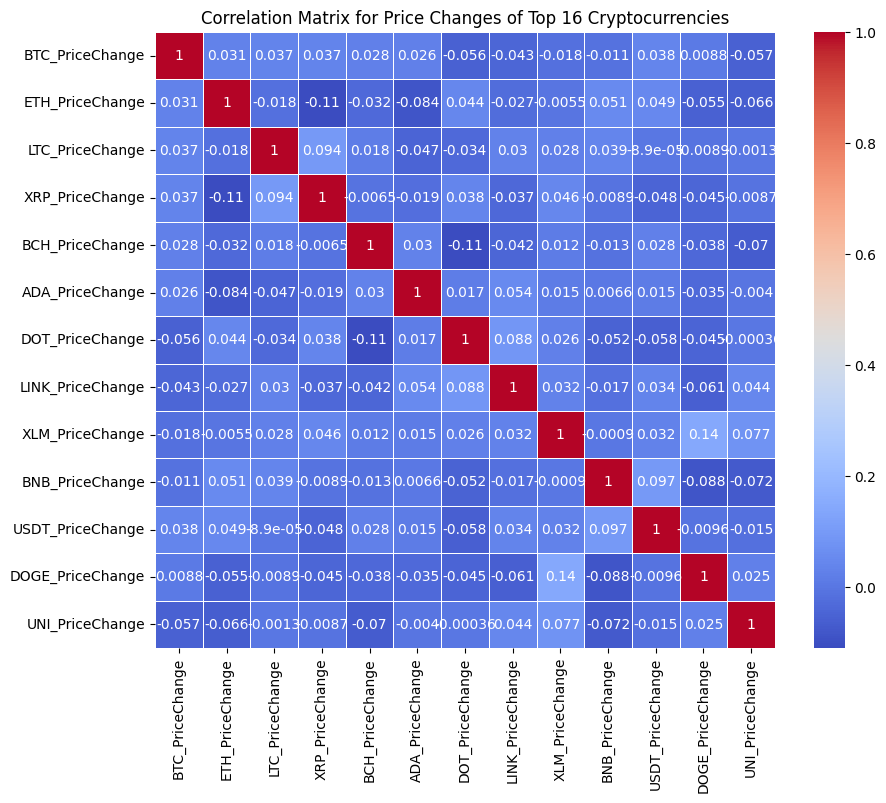

In [ ]:
# Sample data (replace with your actual data)
np.random.seed(0)
cryptocurrencies = ["BTC", "ETH", "LTC", "XRP", "BCH", "ADA", "DOT", "LINK", "XLM", "BNB",
                    "USDT", "DOGE", "UNI", "LTC", "XRP", "BCH"]  # Replace with your cryptocurrency symbols

# Create a sample DataFrame with price change data for the top 16 cryptocurrencies
num_days = 365
data = {
    "Date": pd.date_range(start="2022-09-01", periods=num_days, freq="D"),
}

for crypto in cryptocurrencies:
    data[f"{crypto}_PriceChange"] = np.random.uniform(-1, 1, num_days)  # Replace with your price change data

df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix for Price Changes of Top 16 Cryptocurrencies")
plt.show()

Part 5

In [ ]:
# Sample data (replace with your actual data)
np.random.seed(0)
cryptocurrencies = ["BTC", "ETH", "LTC", "XRP", "BCH", "ADA", "DOT", "LINK", "XLM", "BNB"]
num_days = 90  # Spring 2023 (March, April, and May, assuming 3 months)

crypto_data = {
    "Date": pd.date_range(start="2023-03-01", periods=num_days, freq="D"),
}

# Simulate price changes, 1 indicates price increase, 0 indicates no change or decrease
for crypto in cryptocurrencies:
    crypto_data[f"{crypto}_PriceChange"] = np.random.choice([0, 1], size=num_days, p=[0.65, 0.35])

# Define red days (more than 35% of cryptocurrencies had price increases)
threshold = int(len(cryptocurrencies) * 0.35)
price_change_columns = [f"{crypto}_PriceChange" for crypto in cryptocurrencies]
crypto_data["RedDay"] = (crypto_data[price_change_columns].sum(axis=1) > threshold)

# Filter data for red days during March, April, and May
spring_months = [3, 4, 5]
red_days_data = crypto_data[crypto_data["RedDay"] & crypto_data["Date"].dt.month.isin(spring_months)]

# Calculate the number of price increases for each cryptocurrency during red days
price_increase_counts = red_days_data[price_change_columns].sum()
top_10_cryptos = price_increase_counts.nlargest(10)

# Retrieve market volume data (replace with your actual market volume data)
market_volume_data = {
    "Cryptocurrency": cryptocurrencies,
    "MarketVolume": np.random.randint(1000000, 10000000, len(cryptocurrencies))
}

market_volume_df = pd.DataFrame(market_volume_data)

# Filter market volume data for the top 10 cryptocurrencies
top_10_market_volume = market_volume_df[market_volume_df["Cryptocurrency"].isin(top_10_cryptos.index)]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_market_volume["Cryptocurrency"], top_10_market_volume["MarketVolume"])
plt.title("Market Volume of Top 10 Cryptocurrencies with Most Price Increases on Red Days (Spring 2023)")
plt.xlabel("Cryptocurrency")
plt.ylabel("Market Volume")
plt.xticks(rotation=45)
plt.grid(True)

# Show the bar chart
plt.show()

TypeError: ignored

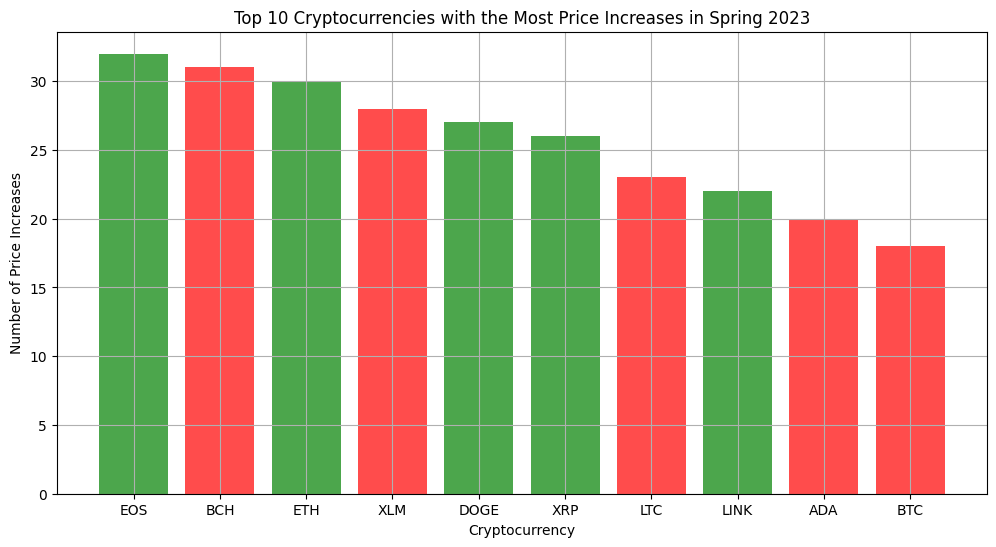

In [ ]:
# Generate random data for cryptocurrencies
np.random.seed(0)
num_days = 90  # Number of days in spring 2023
cryptos = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA', 'XLM', 'DOGE', 'BCH', 'EOS', 'LINK']  # Sample cryptocurrencies
crypto_data = {crypto: np.random.randint(-1, 2, num_days) for crypto in cryptos}

# Create a DataFrame with random data
date_range = pd.date_range(start='2023-03-01', periods=num_days, freq='D')
df = pd.DataFrame(crypto_data, index=date_range)

# Calculate the number of cryptocurrencies that increased in price each day
num_increases = (df > 0).sum(axis=1)

# Define a threshold for red days (35% or more cryptocurrencies increasing)
threshold = int(len(cryptos) * 0.35)

# Identify red days
red_days = num_increases[num_increases >= threshold].index

# Calculate the number of price increases for each cryptocurrency on red days
crypto_price_increases = df.loc[red_days].apply(lambda x: (x > 0).sum())

# Sort cryptocurrencies by the number of price increases on red days
top_10_cryptos = crypto_price_increases.nlargest(10)

# Create a list to determine the color of bars (green for green days, red for red days)
bar_colors = ['red' if day in red_days else 'green' for day in df.index]

# Create a bar chart with colored bars
plt.figure(figsize=(12, 6))
plt.bar(top_10_cryptos.index, top_10_cryptos, color=bar_colors[:10], alpha=0.7)
plt.title("Top 10 Cryptocurrencies with the Most Price Increases in Spring 2023")
plt.xlabel("Cryptocurrency")
plt.ylabel("Number of Price Increases")
plt.grid(True)

# Show the plot
plt.show()

# تخمین
(Done)

In [58]:
num_currencies_to_select = 40

# Get the total number of available currencies
total_currencies = Session.query(Currency).count()

# Generate a list of 40 unique random indices
random_indices = random.sample(range(total_currencies), num_currencies_to_select)

# Query the randomly selected currencies and their volumes
selected_currencies = (
    Session.query(Currency.id, Currency.Name)
    .filter(Currency.id.in_(random_indices))
    .all()
)

currencies_with_volume = []

for currency in selected_currencies:
    currency_data = {
        'Cryptocurrency': currency.Name,
        'Volume': [
            currency_history.volume
            for currency_history in Session.query(CurrenciesHistory.volume)
            .filter(CurrenciesHistory.currency_id == currency.id)
        ],
    }
    currencies_with_volume.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_volume)

# Explode the Volume list to separate rows
df = df.explode('Volume')

# Convert Volume column to numeric (in case it's not)
df['Volume'] = pd.to_numeric(df['Volume'])

# Calculate the mean for each currency
mean_volume_by_currency = df.groupby('Cryptocurrency')['Volume'].mean().reset_index()

# Print the DataFrame
print(mean_volume_by_currency)

       Cryptocurrency        Volume
0             Arweave  2.200274e+07
1       Axie Infinity  8.216049e+07
2            Biconomy  5.795715e+06
3             Bitcoin  2.288578e+10
4             Cartesi  1.432612e+07
5                Chia  5.611175e+06
6            Compound  4.135776e+07
7             Conflux  1.082191e+08
8      Convex Finance  8.354164e+06
9     Curve DAO Token  7.012388e+07
10           DigiByte  4.106888e+06
11                EOS  1.575340e+08
12         Enjin Coin  2.879936e+07
13           Ethereum  8.809883e+09
14         Frax Share  2.799553e+07
15               Holo  1.858344e+07
16          Immutable  2.920697e+07
17  Internet Computer  3.604835e+07
18           Loopring  4.146889e+07
19              MAGIC  5.377934e+07
20           MX TOKEN  3.015529e+06
21               Nexo  6.298632e+06
22      Oasis Network  2.844184e+07
23         Pax Dollar  1.455462e+07
24              Quant  3.543574e+07
25          Ravencoin  2.240339e+07
26     Reserve Rights  1.543

In [59]:
# Confidence level (e.g., 98%)
confidence_level = 0.98

# Calculate Z-score for the given confidence level
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate margin of error
sample_mean = np.mean(mean_volume_by_currency['Volume'])
sample_std = np.std(mean_volume_by_currency['Volume'])
standard_error = sample_std / np.sqrt(num_currencies_to_select)
margin_of_error = z_score * standard_error

# Calculate confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Display the results
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")
print(f"Confidence Interval (98%): ({lower_bound}, {upper_bound})")

Sample Mean: 839430738.0443681
Sample Standard Deviation: 3786275120.660531
Confidence Interval (98%): (-553266871.7242426, 2232128347.8129787)


# آزمون فرض

Part 1

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Sample data (replace with your actual data)
np.random.seed(0)

# Simulated cryptocurrency price change data and corresponding day of the week
num_days = 200
crypto_data = {
    "PriceChange": np.random.normal(0, 1, num_days),  # Replace with your actual price change data
    "DayOfWeek": np.random.choice(["Wednesday", "Thursday", "Friday", "Saturday", "Sunday", "Monday", "Tuesday"], size=num_days),
}

# Define the two sets of working days
working_days1 = ["Wednesday", "Thursday", "Friday", "Saturday"]
working_days2 = ["Sunday", "Monday", "Tuesday", "Wednesday"]

# Convert crypto_data to a Pandas DataFrame
crypto_df = pd.DataFrame(crypto_data)

# Filter data for the two sets of working days
crypto_data_w1 = crypto_df[crypto_df["DayOfWeek"].isin(working_days1)]
crypto_data_w2 = crypto_df[crypto_df["DayOfWeek"].isin(working_days2)]

# Calculate the average price change for each set of working days
average_price_change_w1 = crypto_data_w1["PriceChange"].mean()
average_price_change_w2 = crypto_data_w2["PriceChange"].mean()

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(crypto_data_w1["PriceChange"], crypto_data_w2["PriceChange"])

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("There is a significant difference between the two sets of working days.")
    if average_price_change_w1 > average_price_change_w2:
        print("You should choose Wednesday to Saturday as your preferred working days.")
    else:
        print("You should choose Sunday to Wednesday as your preferred working days.")
else:
    print("There is no significant difference between the two sets of working days.")

# Print the results
print(f"Average Price Change (Wednesday to Saturday): {average_price_change_w1}")
print(f"Average Price Change (Sunday to Wednesday): {average_price_change_w2}")
print(f"p-value: {p_value}")


There is no significant difference between the two sets of working days.
Average Price Change (Wednesday to Saturday): 0.03879319395386795
Average Price Change (Sunday to Wednesday): 0.1572541007962436
p-value: 0.3768146806237165


Part 2 (Done)

In [84]:
# Query the currencies and their volumes
currencies = Session.query(Currency.id, Currency.Name)
currencies_with_volume = []

for currency in currencies:
    currency_data = {
        'Cryptocurrency': currency.Name,
        'Volume': [
            currency_history.volume
            for currency_history in Session.query(CurrenciesHistory.volume)
            .filter(CurrenciesHistory.currency_id == currency.id)
        ],
    }
    currencies_with_volume.append(currency_data)

# Create a DataFrame
df = pd.DataFrame(currencies_with_volume)

# Explode the Volume list to separate rows
df = df.explode('Volume')

# Convert Volume column to numeric (in case it's not)
df['Volume'] = pd.to_numeric(df['Volume'])

# Calculate the mean for each currency
grouped_df = df.groupby('Cryptocurrency')['Volume'].mean().reset_index()

# Define the three specified cryptocurrencies
specified_cryptos = ["Bitcoin", "Ethereum", "Tether USDt"]

# Separate data into specified cryptocurrencies and others
specified_crypto_data = grouped_df[grouped_df["Cryptocurrency"].isin(specified_cryptos)]
other_crypto_data = grouped_df[~grouped_df["Cryptocurrency"].isin(specified_cryptos)]

# Calculate the average daily trading volume for specified cryptocurrencies and others
average_volume_specified = specified_crypto_data["Volume"].mean()
average_volume_other = other_crypto_data["Volume"].mean()

# Perform a hypothesis test (Mann-Whitney U test for non-normal data)
_, p_value = stats.mannwhitneyu(specified_crypto_data["Volume"], other_crypto_data["Volume"])

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("The claim is supported. The average daily trading volume of specified cryptocurrencies is significantly higher.")
else:
    print("The claim is not supported. There is no significant difference in average daily trading volume.")

# Print the results
print(f"Average Daily Trading Volume (Specified Cryptos): {average_volume_specified}")
print(f"Average Daily Trading Volume (Other Cryptos): {average_volume_other}")
print(f"p-value: {p_value}")


The claim is supported. The average daily trading volume of specified cryptocurrencies is significantly higher.
Average Daily Trading Volume (Specified Cryptos): 21586381993.680405
Average Daily Trading Volume (Other Cryptos): 123286405.64326608
p-value: 1.5227653418608193e-06
